In [1]:
import os.path

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
def show(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


def show_raw(image):
    plt.figure(figsize=(30, 30))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [3]:
img_name = 'P10_8175.JPG'
dir_name = 'H_18-11-22/Map10-Calibration_5ms'
img_path = os.path.join(dir_name, img_name)
# img = cv2.imread(img_path)
# show(img)
# print(img.shape)

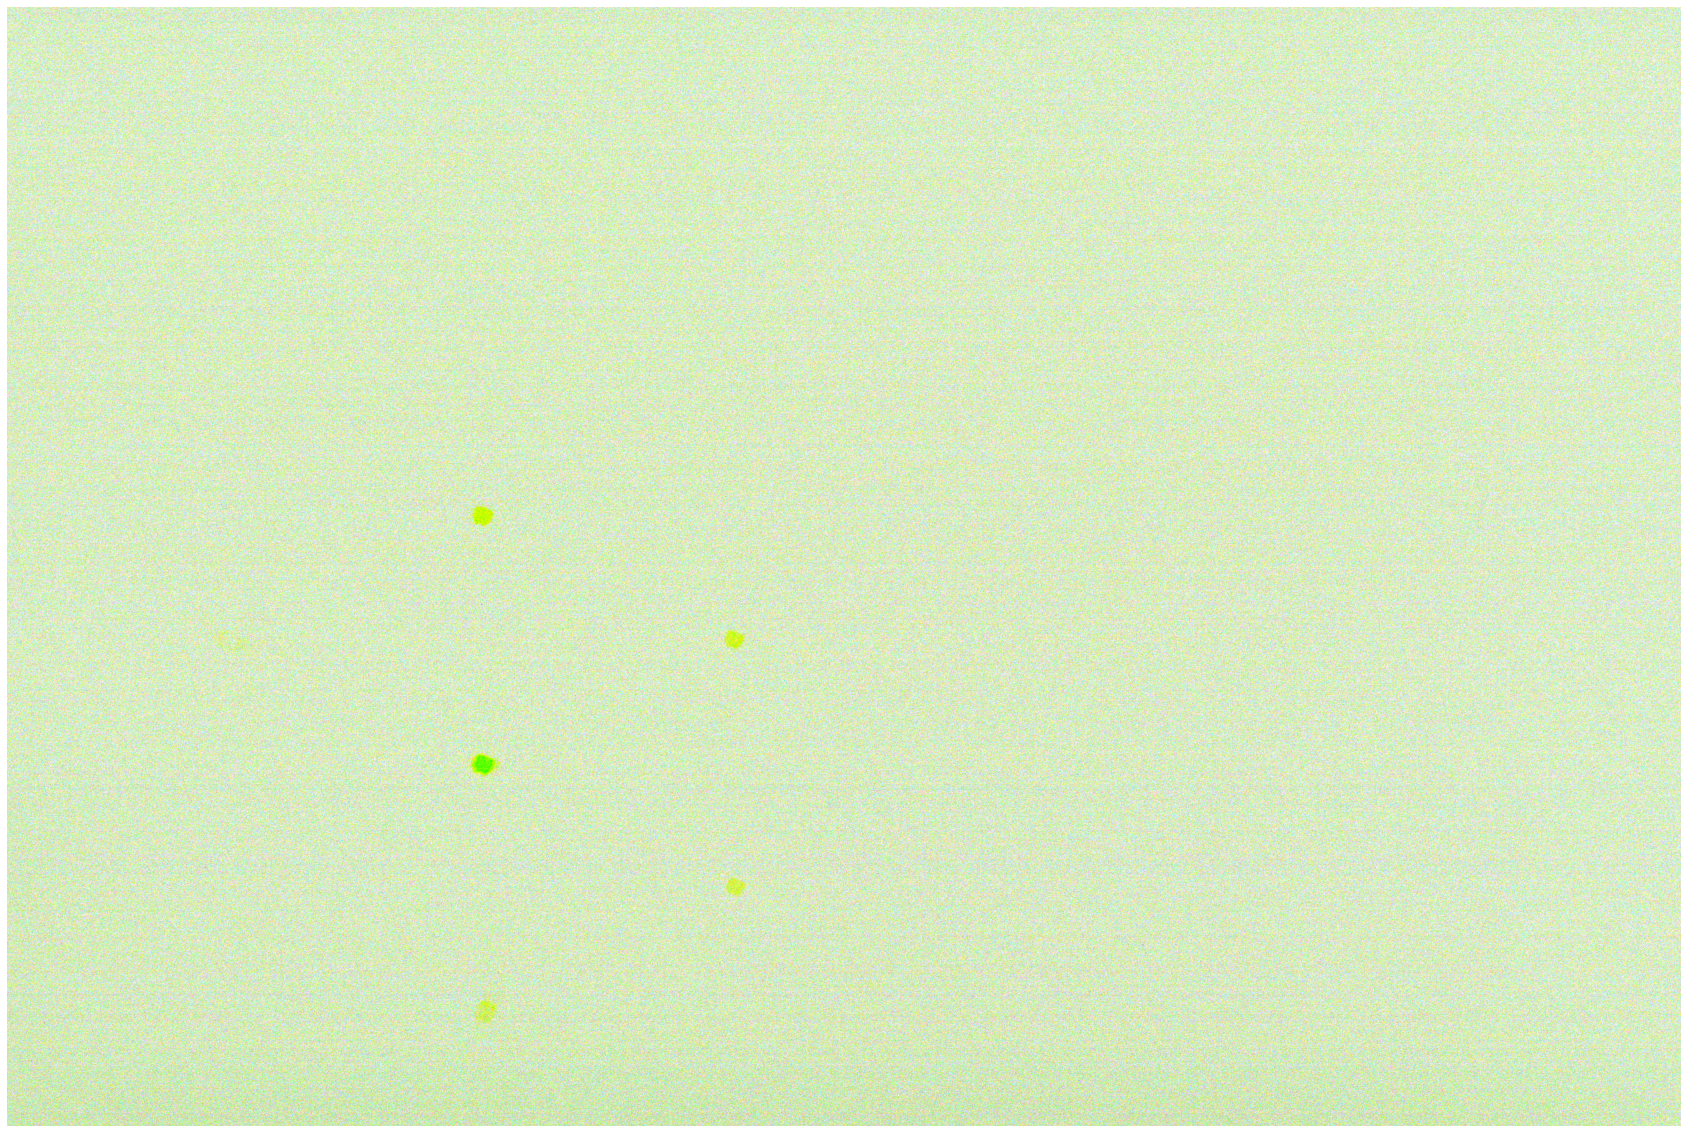

(4032, 6032, 3)


In [45]:
import rawpy
from PIL import Image

raw_name = 'C10_8790.NEF'
raw_path = os.path.join(dir_name, raw_name)
raw = rawpy.imread(raw_path)
# rgb = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), use_camera_wb=False, output_bps=8,
#                       user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, bright=1.0,
#                       demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR)
rgb = raw.postprocess()

# rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
rgb = cv2.bitwise_not(rgb)
img_raw = Image.fromarray(rgb)  # Pillow image
show_raw(rgb)
print(rgb.shape)

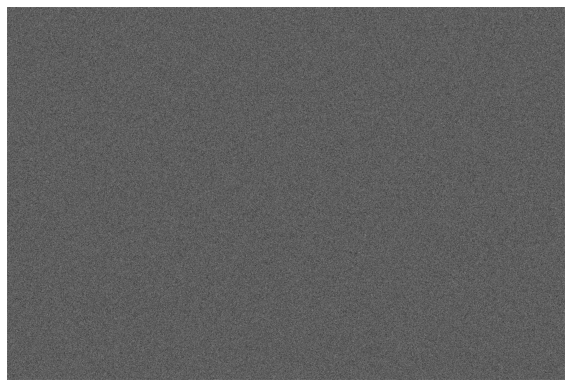

In [46]:
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# inverted = cv2.bitwise_not(gray)
edges = cv2.Canny(gray, 6, 3)
show(edges)


In [47]:
test = raw.raw_image.copy()
test[test < 1500] = 0
print(test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


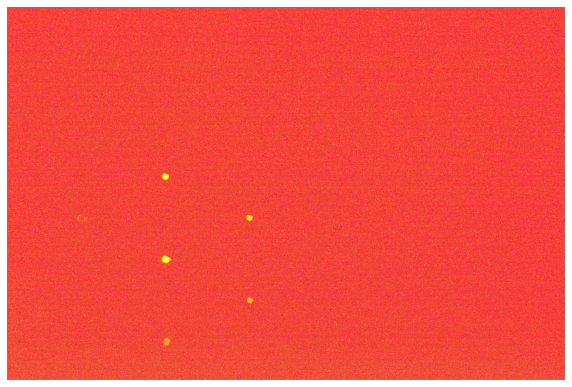

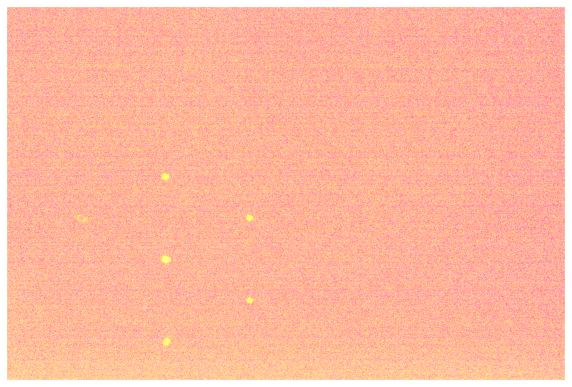

In [48]:
hsv = cv2.cvtColor(rgb, cv2.COLOR_BGR2HSV)
show(hsv)

alpha = 3.0  # Contrast control (1.0-3.0)
beta = 0  # Brightness control (0-100)
# gray = cv2.cvtColor(hsv, cv2.COLOR_BGR2GRAY)
res = cv2.convertScaleAbs(hsv, alpha=alpha, beta=beta)

show(res)

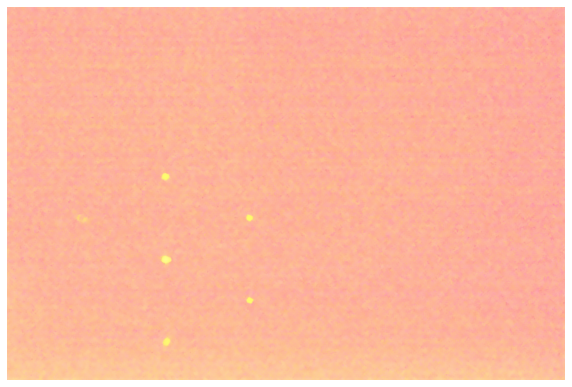

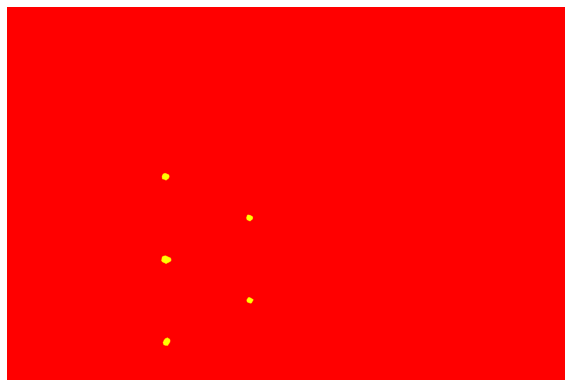

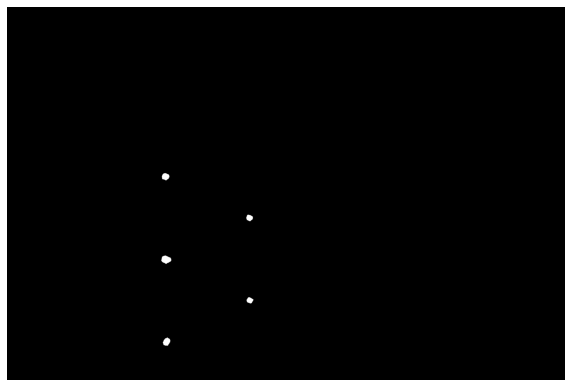

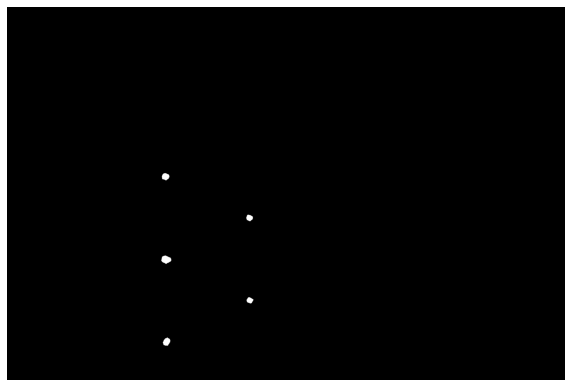

True

In [49]:
# gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(res, (35, 35), 3)
bilateral = cv2.bilateralFilter(blur, 11, 75, 75)
denoised = cv2.fastNlMeansDenoisingColored(bilateral, None, 10, 10, 9, 51)
show(denoised)
thresh = 220
maxval = 255

ret, thresh1 = cv2.threshold(denoised, thresh, maxval, cv2.THRESH_BINARY)
# res = res.astype(np.uint8)

# th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 43, 3)
show(thresh1)
h, s, v = cv2.split(thresh1)
show(s)
ret, gray_thr = cv2.threshold(s, 127, 255, cv2.THRESH_BINARY)
show(gray_thr)

cv2.imwrite('map1.png', gray_thr)
# show(th3)
# show(bilateral)

[INFO] examining component 1/592 (background)


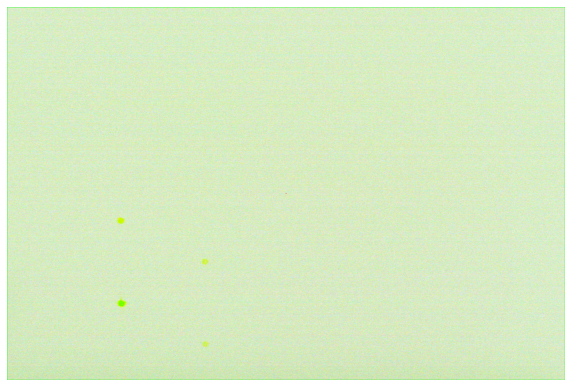

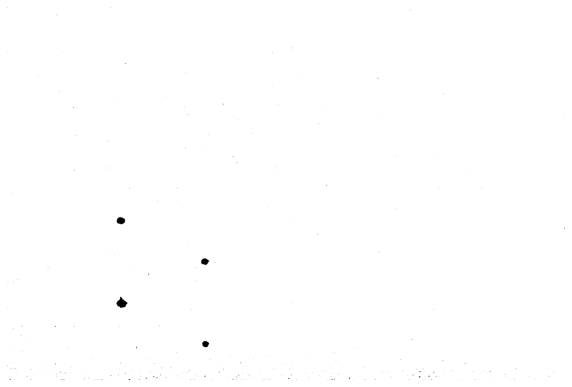

[INFO] examining component 2/592


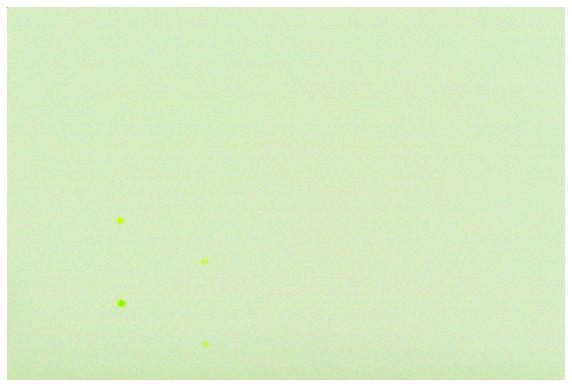

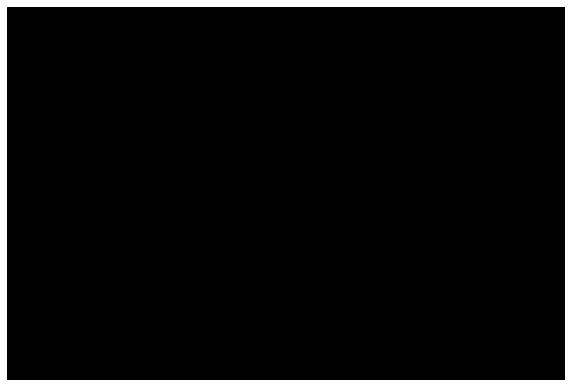

[INFO] examining component 3/592


KeyboardInterrupt: 

In [34]:
#apply median blur, 15 means it's smoothing image 15x15 pixels
blur = cv2.medianBlur(rgb, 15)

#convert to hsv
hsv = cv2.cvtColor(blur, cv2.COLOR_BGR2HSV)

#color definition
red_lower = np.array([0, 100, 100])
red_upper = np.array([255, 255, 255])

#red color mask (sort of thresholding, actually segmentation)
mask = cv2.inRange(hsv, red_lower, red_upper)

connectivity = 4
# Perform the operation
output = cv2.connectedComponentsWithStats(mask, connectivity, cv2.CV_32S)

(numLabels, labels, stats, centroids) = output
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    # if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]

    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = rgb.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask
    show(output)
    show(componentMask)


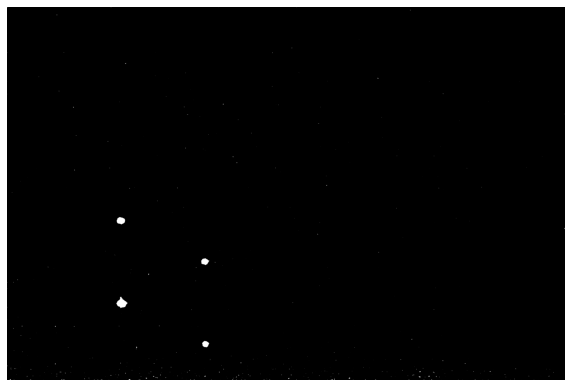

In [35]:
show(mask)


In [ ]:

edges = cv2.Canny(thresh1, 10, 35)
show(edges)

In [ ]:

edges = cv2.Canny(thresh1, 10, 35)
show(edges)

In [ ]:
src_blur = cv2.GaussianBlur(gray, (5, 5), 0)
# src_gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
src_gray = cv2.convertScaleAbs(src_blur)

laplacian = cv2.Laplacian(src_gray, cv2.CV_16S, 5)
# sobelx = cv2.Sobel(rgb, cv2.CV_64F, 1, 0, ksize=3, delta=0, scale=10)  # x
# sobely = cv2.Sobel(rgb, cv2.CV_64F, 0, 1, ksize=3, delta=0, scale=10)  # y
# sobelxy = cv2.Sobel(rgb, cv2.CV_64F, 0, 1, ksize=3, delta=0, scale=10)  # y

sobelx = cv2.Sobel(src_gray, cv2.CV_16S, 1, 0, ksize=5)  # x
sobely = cv2.Sobel(src_gray, cv2.CV_16S, 0, 1, ksize=5)  # y
sobelxy = cv2.Sobel(src_gray, cv2.CV_16S, 1, 1, ksize=5)  #

plt.figure(figsize=(40, 40))
plt.subplot(2, 2, 1), plt.imshow(src_gray, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(laplacian, cmap='gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
# plt.subplot(2, 2, 4), plt.imshow(sobely, cmap='gray')
# plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(cv2.convertScaleAbs(sobelxy), cmap='gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])

plt.show()

In [ ]:
# # Set up the detector with default parameters.
# detector = cv2.SimpleBlobDetector()
# gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# show(gray)
# # Detect blobs.
# keypoints = detector.detect(gray)
#
# # Draw detected blobs as red circles.
# # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
# im_with_keypoints = cv2.drawKeypoints(gray, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#
# # Show keypoints
# show(im_with_keypoints)

In [ ]:
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
height, width, channels = img.shape
im1 = blank_image = np.zeros((height, width, 3), np.uint8)
im1 = cv2.drawContours(im1, contours, -1, (0, 255, 0), 2)
show(im1)

In [ ]:
import rawpy
from PIL import Image

raw_name = 'C10_8620.NEF'
raw_path = os.path.join(dir_name, raw_name)
raw = rawpy.imread(raw_path)
rgb = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1), use_camera_wb=False, output_bps=8,
                      user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True, bright=1.0,
                      demosaic_algorithm=rawpy.DemosaicAlgorithm.LINEAR)
# rgb = raw.postprocess(output_color=rawpy.ColorSpace.sRGB)

rgb = cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR)
# rgb = cv2.bitwise_not(rgb)
img_raw = Image.fromarray(rgb)  # Pillow image
show(rgb)

b, g, r = cv2.split(rgb)
ret, newIm = cv2.threshold(r, 4, 255, cv2.THRESH_BINARY)
newIm = cv2.bitwise_not(newIm)
show(newIm)